In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Advertising_raw.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [15]:
def scatter_plot(feature):
    plt.figure(figsize=(4, 3))
    plt.scatter(data[feature], data.sales, c='k')
    plt.xlabel(f'Money spent on {feature}')
    plt.ylabel('Sales Generated')
    plt.show()

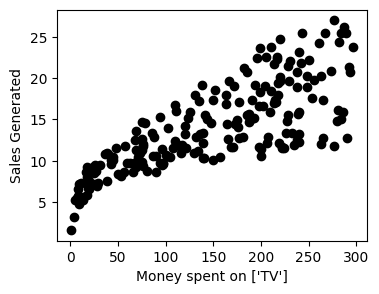

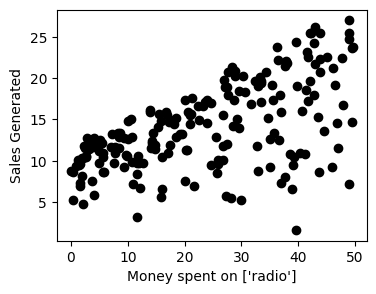

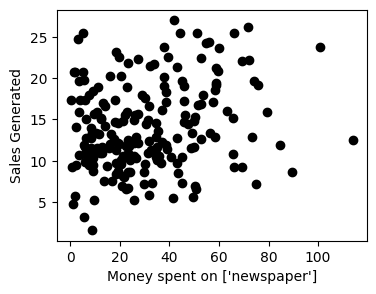

In [17]:
scatter_plot(['TV'])
scatter_plot(['radio'])
scatter_plot(['newspaper'])

Baseline Model -> Linear Regression

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [20]:
X = data.drop(columns=['sales'])
y = data.sales

In [24]:
lin_model = LinearRegression()
MSE = cross_val_score(lin_model, X, y, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(MSE)
-mean_mse

3.07294659710021

### Regualization

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [32]:
ridge = Ridge()

param = {'alpha' : [1e-15, 1e-10, 1e-5, 1e-3, 1e-1, 1, 2, 5, 10, 20, 50]}

ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.1, 1, 2, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [33]:
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 20}
3.072671338341143


It's lower than the baseline but very less

In [34]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X, y)

c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.044e+02, tolerance: 4.383e-01
  model = cd_fast.enet_coordinate_descent(
c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.173e+02, tolerance: 4.503e-01
  model = cd_fast.enet_coordinate_descent(
c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.585e+02, tolerance: 4.199e-01
  model = cd_fast.enet_

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.1, 1, 2, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [35]:
print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 2}
3.030024697576212


This is better than our baseline model